# FAKE NEWS
Dans ce projet, notre objectif est de traiter le problème croissant de la désinformation (fake news) et de nous concentrer sur la justification de la classification de ces informations.

##Méthodologie appliquée dans le projet
### Processus CRISP-DM
Le cadre CRISP-DM guide le développement systématique des projets de fouille de données et de science des données. Il se compose de six étapes clés :

1. Compréhension du métier (Business Understanding)
2. Compréhension des données (Data Understanding)
3. Préparation des données (Data Preparation)
4. Modélisation (Modeling)
5. Évaluation (Evaluation)
6. Déploiement (Deployment)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
pd.options.display.max_columns = None


In [ ]:

df = pd.read_csv('train2.tsv', delimiter='\t', header=None)
df_val = pd.read_csv('val2.tsv', delimiter='\t', header=None)
df_test = pd.read_csv('test2.tsv', delimiter='\t', header=None)

In [ ]:
header_names = ['Id', 'ID_Json','label','statement','subject(s)','speaker','speakers_job_title','state_info','total_credit_history_count',
                'barely_true_counts','false_counts','half_true_counts','mostly_true_counts','pants_on_fire_counts','context ',
                'extracted_justification']

In [ ]:
df_val.columns = header_names
df_test.columns = header_names

In [ ]:
df.columns = header_names
df.head()

,Id,ID_Json,label,statement,subject(s),speaker,speakers_job_title,state_info,total_credit_history_count,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,extracted_justification
0,0.0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1,1.0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2,2.0,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
3,3.0,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
4,4.0,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."


In [ ]:
df['statement'].unique()

array(['Says the Annies List political group supports third-trimester abortions on demand.',
       'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.',
       'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."',
       ...,
       'Says an alternative to Social Security that operates in Galveston County, Texas, has meant that participants will retire with a whole lot more money than under Social Security.',
       'On lifting the U.S. Cuban embargo and allowing travel to Cuba.',
       "The Department of Veterans Affairs has a manual out there telling our veterans stuff like, 'Are you really of value to your community?' You know, encouraging them to commit suicide."],
      dtype=object)

# Compréhension des données

## Exploratory Data Analysis - EDA

In [ ]:
# Les dimension de la DataFrame
print("Shape of Training DataFrame:", df.shape)

Shape of Training DataFrame: (10242, 16)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          10240 non-null  float64
 1   ID_Json                     10240 non-null  object 
 2   label                       10240 non-null  object 
 3   statement                   10240 non-null  object 
 4   subject(s)                  10238 non-null  object 
 5   speaker                     10238 non-null  object 
 6   speakers_job_title          7343 non-null   object 
 7   state_info                  8032 non-null   object 
 8   total_credit_history_count  10238 non-null  object 
 9   barely_true_counts          10238 non-null  float64
 10  false_counts                10238 non-null  float64
 11  half_true_counts            10238 non-null  float64
 12  mostly_true_counts          10238 non-null  float64
 13  pants_on_fire_counts        102

In [ ]:
df.describe()

,Id,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts
count,10240.000000,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000
mean,5136.103809,11.533210,13.286482,17.133718,16.434265,6.201407
std,2964.754693,18.973764,24.112936,35.846511,36.151688,16.128927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2572.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5132.500000,2.000000,2.000000,3.000000,3.000000,1.000000
75%,7708.250000,12.000000,12.000000,13.000000,11.000000,5.000000
max,10268.000000,70.000000,114.000000,160.000000,163.000000,105.000000


### Data Analysis and Viz

<ipython-input-166-d3ed4d7529df>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(label_counts))


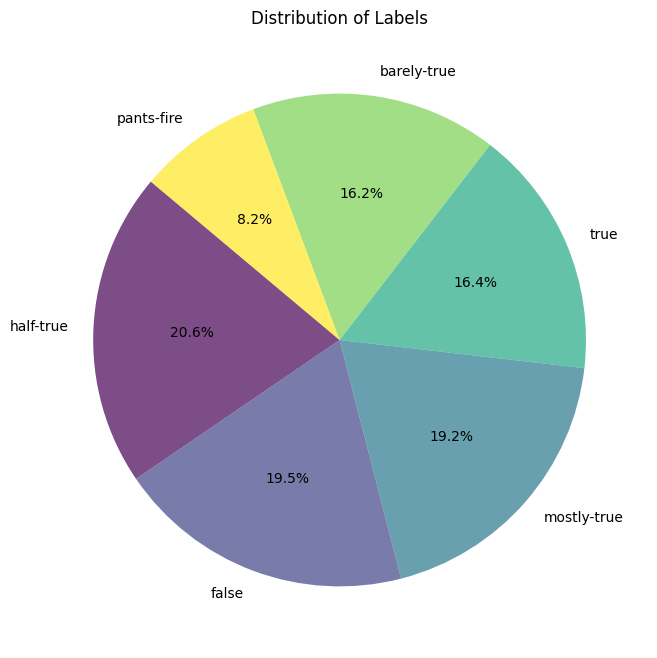

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


label_counts = df['label'].value_counts()

cmap = cm.get_cmap('viridis', len(label_counts))
cmap_colors = cmap.colors.copy()

adjusted_alpha = 0.7
for i in range(len(cmap_colors)):
    cmap_colors[i] = (*cmap_colors[i][:3], adjusted_alpha)

plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=cmap_colors)
plt.title('Distribution of Labels')
plt.show()


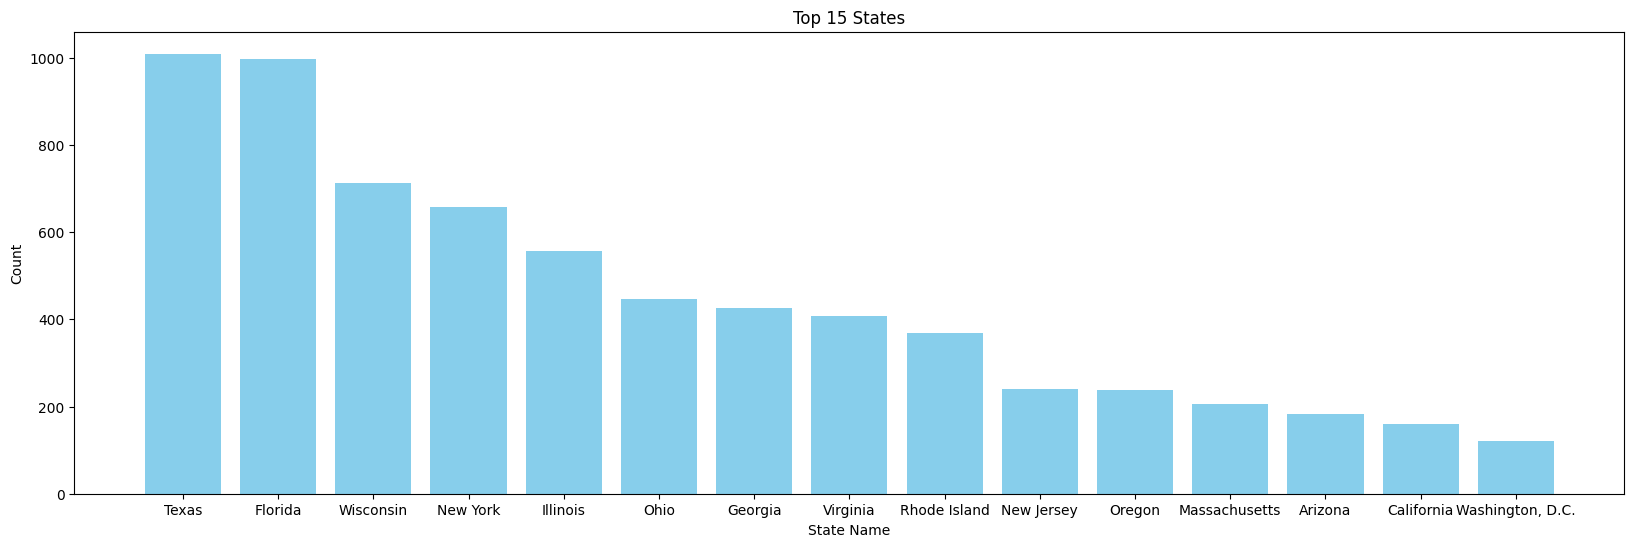

In [ ]:
# Get the counts of unique values in the 'state_info' column
value_counts = df['state_info'].value_counts().head(15)

# Figure size
plt.figure(figsize=(20, 6))

plt.bar(value_counts.index, value_counts, color='skyblue')

# Add labels and title
plt.xlabel('State Name')
plt.ylabel('Count')
plt.title('Top 15 States')

plt.show()

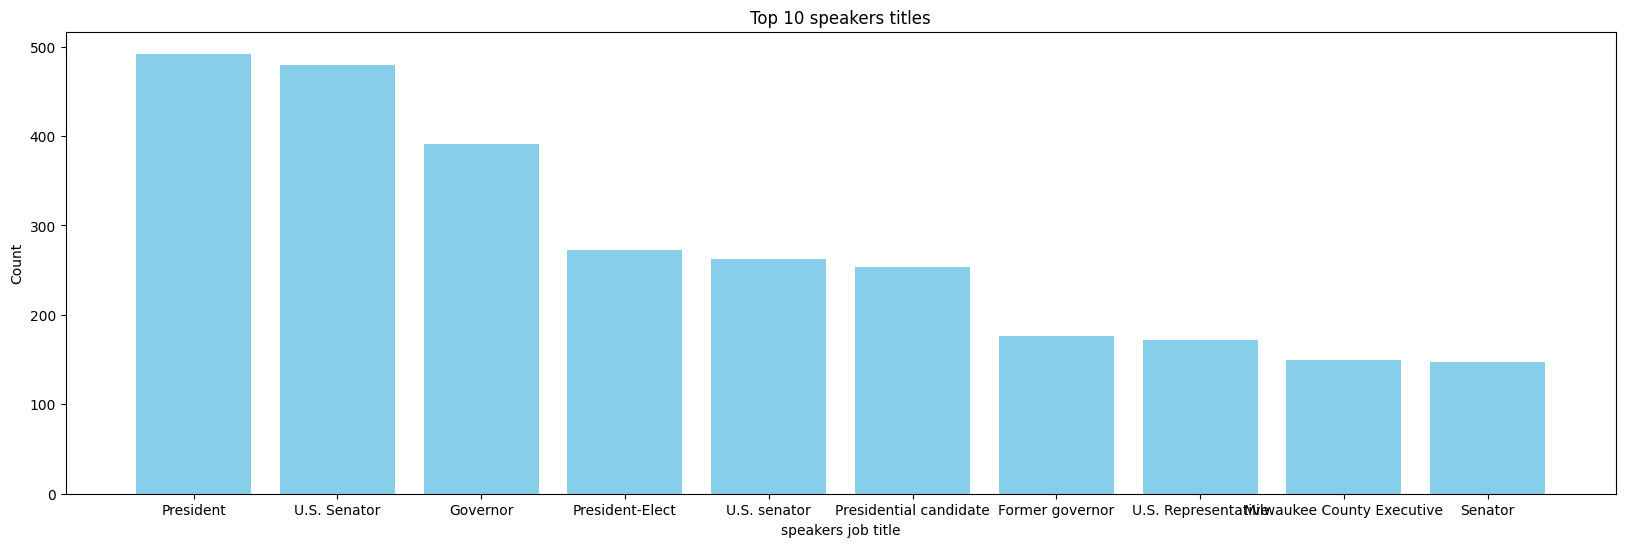

In [ ]:
# Get the counts of unique values in the 'speakers_job_title' column
value_counts = df['speakers_job_title'].value_counts().head(10)

# Figure size
plt.figure(figsize=(20, 6))

plt.bar(value_counts.index, value_counts, color='skyblue')

# Add labels and title
plt.xlabel('speakers job title')
plt.ylabel('Count')
plt.title('Top 10 speakers titles')

plt.show()

### Vérification des valeurs manquantes

In [ ]:
# Percentage of missing values of the train data
print("Percentage of missing values of the Train Data:\n")
missing_percentages = (df.isnull().mean(axis=0)*100).sort_values()
for col_name, percent in missing_percentages.items():
    print(f"{col_name}: {percent:.2f}%")

Percentage of missing values of the Train Data:

Id: 0.02%
ID_Json: 0.02%
label: 0.02%
statement: 0.02%
subject(s): 0.04%
speaker: 0.04%
total_credit_history_count: 0.04%
barely_true_counts: 0.04%
false_counts: 0.04%
half_true_counts: 0.04%
mostly_true_counts: 0.04%
pants_on_fire_counts: 0.04%
extracted_justification: 0.86%
context : 1.02%
state_info: 21.58%
speakers_job_title: 28.31%


In [ ]:
# Columns to be dropped
columns_to_drop = ['speakers_job_title', 'state_info','Id','ID_Json']

# Dropping the columns from each dataframe
df.drop(columns=columns_to_drop, inplace=True)
df_test.drop(columns=columns_to_drop, inplace=True)
df_val.drop(columns=columns_to_drop, inplace=True)

# Checking the first few rows of each dataframe to confirm the drop
train_head_after_drop = df.describe()
test_head_after_drop = df_test.describe()
val_head_after_drop = df_val.describe()

(train_head_after_drop, test_head_after_drop, val_head_after_drop)

(       barely_true_counts  false_counts  half_true_counts  mostly_true_counts  \
 count        10238.000000  10238.000000      10238.000000        10238.000000   
 mean            11.533210     13.286482         17.133718           16.434265   
 std             18.973764     24.112936         35.846511           36.151688   
 min              0.000000      0.000000          0.000000            0.000000   
 25%              0.000000      0.000000          0.000000            0.000000   
 50%              2.000000      2.000000          3.000000            3.000000   
 75%             12.000000     12.000000         13.000000           11.000000   
 max             70.000000    114.000000        160.000000          163.000000   
 
        pants_on_fire_counts  
 count          10238.000000  
 mean               6.201407  
 std               16.128927  
 min                0.000000  
 25%                0.000000  
 50%                1.000000  
 75%                5.000000  
 max        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   label                       10240 non-null  object 
 1   statement                   10240 non-null  object 
 2   subject(s)                  10238 non-null  object 
 3   speaker                     10238 non-null  object 
 4   total_credit_history_count  10238 non-null  object 
 5   barely_true_counts          10238 non-null  float64
 6   false_counts                10238 non-null  float64
 7   half_true_counts            10238 non-null  float64
 8   mostly_true_counts          10238 non-null  float64
 9   pants_on_fire_counts        10238 non-null  float64
 10  context                     10138 non-null  object 
 11  extracted_justification     10154 non-null  object 
dtypes: float64(5), object(7)
memory usage: 960.3+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   label                       1267 non-null   object
 1   statement                   1267 non-null   object
 2   subject(s)                  1267 non-null   object
 3   speaker                     1267 non-null   object
 4   total_credit_history_count  1267 non-null   object
 5   barely_true_counts          1267 non-null   int64 
 6   false_counts                1267 non-null   int64 
 7   half_true_counts            1267 non-null   int64 
 8   mostly_true_counts          1267 non-null   int64 
 9   pants_on_fire_counts        1267 non-null   int64 
 10  context                     1250 non-null   object
 11  extracted_justification     1258 non-null   object
dtypes: int64(5), object(7)
memory usage: 118.9+ KB


In [ ]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   label                       1284 non-null   object
 1   statement                   1284 non-null   object
 2   subject(s)                  1284 non-null   object
 3   speaker                     1284 non-null   object
 4   total_credit_history_count  1284 non-null   object
 5   barely_true_counts          1284 non-null   int64 
 6   false_counts                1284 non-null   int64 
 7   half_true_counts            1284 non-null   int64 
 8   mostly_true_counts          1284 non-null   int64 
 9   pants_on_fire_counts        1284 non-null   int64 
 10  context                     1272 non-null   object
 11  extracted_justification     1280 non-null   object
dtypes: int64(5), object(7)
memory usage: 120.5+ KB


# Préparation des données

## Traitement des valeurs manquantes pour df (Training test)

In [ ]:
colonne = ['label','subject(s)','total_credit_history_count','speaker','barely_true_counts','false_counts','half_true_counts','mostly_true_counts','pants_on_fire_counts','extracted_justification']

In [ ]:
df.dropna(subset=colonne,inplace = True)

In [ ]:
df['statement'] = df['statement'].fillna("No Statement")

In [ ]:
df['context '].fillna('Contexte non disponible',inplace = True)

In [ ]:
print("Percentage of missing values of the Train Data:\n")
missing_percentages = (df.isnull().mean(axis=0)*100).sort_values()
for col_name, percent in missing_percentages.items():
    print(f"{col_name}: {percent:.2f}%")

Percentage of missing values of the Train Data:

label: 0.00%
statement: 0.00%
subject(s): 0.00%
speaker: 0.00%
total_credit_history_count: 0.00%
barely_true_counts: 0.00%
false_counts: 0.00%
half_true_counts: 0.00%
mostly_true_counts: 0.00%
pants_on_fire_counts: 0.00%
context : 0.00%
extracted_justification: 0.00%


#Traitement des valeurs manquantes pour df_test (Testing set)

In [ ]:
print("Percentage of missing values of the Test Data:\n")
missing_percentages = (df_test.isnull().mean(axis=0)*100).sort_values()
for col_name, percent in missing_percentages.items():
    print(f"{col_name}: {percent:.2f}%")

Percentage of missing values of the Test Data:

label: 0.00%
statement: 0.00%
subject(s): 0.00%
speaker: 0.00%
total_credit_history_count: 0.00%
barely_true_counts: 0.00%
false_counts: 0.00%
half_true_counts: 0.00%
mostly_true_counts: 0.00%
pants_on_fire_counts: 0.00%
extracted_justification: 0.71%
context : 1.34%


In [ ]:
df_test.dropna(subset=['extracted_justification'],inplace = True)

In [ ]:
df_test['context '].fillna('Contexte non disponible',inplace = True)

In [ ]:
print("Percentage of missing values of the Test Data:\n")
missing_percentages = (df_test.isnull().mean(axis=0)*100).sort_values()
for col_name, percent in missing_percentages.items():
    print(f"{col_name}: {percent:.2f}%")

Percentage of missing values of the Test Data:

label: 0.00%
statement: 0.00%
subject(s): 0.00%
speaker: 0.00%
total_credit_history_count: 0.00%
barely_true_counts: 0.00%
false_counts: 0.00%
half_true_counts: 0.00%
mostly_true_counts: 0.00%
pants_on_fire_counts: 0.00%
context : 0.00%
extracted_justification: 0.00%


#Traitement des valeurs manquantes pour df_val (Validation set)


In [ ]:
print("Percentage of missing values of the Validation Data:\n")
missing_percentages = (df_val.isnull().mean(axis=0)*100).sort_values()
for col_name, percent in missing_percentages.items():
    print(f"{col_name}: {percent:.2f}%")

Percentage of missing values of the Validation Data:

label: 0.00%
statement: 0.00%
subject(s): 0.00%
speaker: 0.00%
total_credit_history_count: 0.00%
barely_true_counts: 0.00%
false_counts: 0.00%
half_true_counts: 0.00%
mostly_true_counts: 0.00%
pants_on_fire_counts: 0.00%
extracted_justification: 0.31%
context : 0.93%


In [ ]:
df_val.dropna(subset=['extracted_justification'],inplace = True)

In [ ]:
df_val['context '].fillna('Contexte non disponible',inplace = True)

In [ ]:
print("Percentage of missing values of the Validation Data:\n")
missing_percentages = (df_val.isnull().mean(axis=0)*100).sort_values()
for col_name, percent in missing_percentages.items():
    print(f"{col_name}: {percent:.2f}%")

Percentage of missing values of the Validation Data:

label: 0.00%
statement: 0.00%
subject(s): 0.00%
speaker: 0.00%
total_credit_history_count: 0.00%
barely_true_counts: 0.00%
false_counts: 0.00%
half_true_counts: 0.00%
mostly_true_counts: 0.00%
pants_on_fire_counts: 0.00%
context : 0.00%
extracted_justification: 0.00%


In [ ]:
df.shape
df_test.shape
df_val.shape

(1280, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10154 entries, 0 to 10241
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   label                       10154 non-null  object 
 1   statement                   10154 non-null  object 
 2   subject(s)                  10154 non-null  object 
 3   speaker                     10154 non-null  object 
 4   total_credit_history_count  10154 non-null  object 
 5   barely_true_counts          10154 non-null  float64
 6   false_counts                10154 non-null  float64
 7   half_true_counts            10154 non-null  float64
 8   mostly_true_counts          10154 non-null  float64
 9   pants_on_fire_counts        10154 non-null  float64
 10  context                     10154 non-null  object 
 11  extracted_justification     10154 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.0+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1266
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   label                       1258 non-null   object
 1   statement                   1258 non-null   object
 2   subject(s)                  1258 non-null   object
 3   speaker                     1258 non-null   object
 4   total_credit_history_count  1258 non-null   object
 5   barely_true_counts          1258 non-null   int64 
 6   false_counts                1258 non-null   int64 
 7   half_true_counts            1258 non-null   int64 
 8   mostly_true_counts          1258 non-null   int64 
 9   pants_on_fire_counts        1258 non-null   int64 
 10  context                     1258 non-null   object
 11  extracted_justification     1258 non-null   object
dtypes: int64(5), object(7)
memory usage: 127.8+ KB


### Conversion de Dtypes

# Partie 1 : Classification Non Supervisée:  
Dans cette première partie, l'objectif est d'appliquer l'algorithme K-Means pour la détection non supervisée des Fake-news en se limitant à la colonne « statement ».

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# élumination des stop words
stop_words = set(stopwords.words('english'))

df['processed_statement'] = df['statement'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

#### With TF-IDF : Fréquence des mots

In [ ]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the text data into numerical features
X = vectorizer.fit_transform(df['processed_statement'])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=3)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X.toarray())

# Create a DataFrame with the PCA-transformed data
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])

# Print the result
print(df_pca)

           PCA1      PCA2      PCA3
0     -0.018193  0.019839 -0.058081
1     -0.025473  0.097896  0.033159
2     -0.026727  0.052007 -0.051726
3      0.289630 -0.017856 -0.023739
4     -0.017600  0.003828 -0.022737
...         ...       ...       ...
10149 -0.020640 -0.020818 -0.034301
10150 -0.019672 -0.012093 -0.029163
10151 -0.025533  0.008926 -0.080887
10152 -0.017632 -0.003804 -0.031087
10153 -0.012519 -0.005332 -0.039076

[10154 rows x 3 columns]


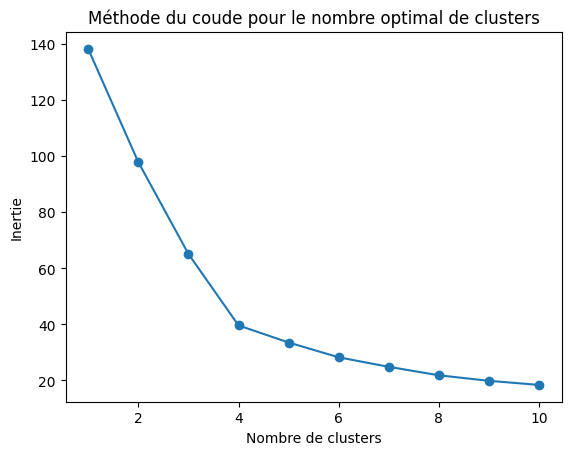

In [ ]:
# Trouver le nombre optimal de clusters avec la méthode du coude (Elbow Method)
inertia_values = []
for i in range(1, 11):  # Essayez différents nombres de clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour le nombre optimal de clusters')
plt.show()

In [ ]:
# Choisissez le nombre optimal de clusters basé sur la méthode du coude
optimal_clusters = 4  # Mettez à jour avec le nombre trouvé à partir de la méthode du coude

# Entraînez K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(X_pca)


KMeans(n_clusters=4, n_init=10, random_state=42)

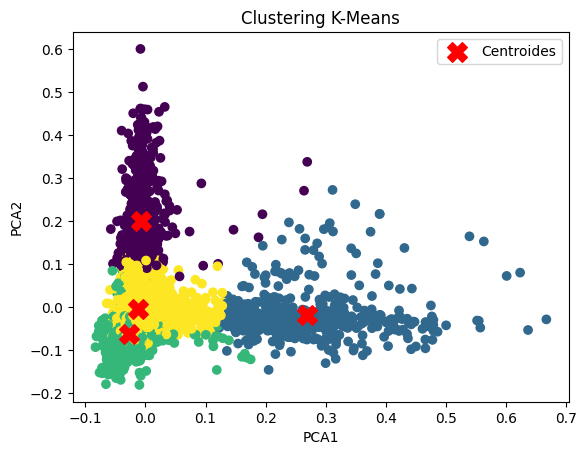

In [ ]:
# Tracer les clusters en 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroides')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering K-Means')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Silhouette Score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Visualization (for 2D PCA)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title("K-Means Clustering")
plt.show()


In [ ]:
from sklearn import metrics

# Assuming you have a 'label' column in your DataFrame representing the real classes
real_labels = df['label'].astype(str)

# Calculate metrics
precision = metrics.precision_score(real_labels, kmeans.labels_, average='weighted')
recall = metrics.recall_score(real_labels, kmeans.labels_, average='weighted')
f1_score = metrics.f1_score(real_labels, kmeans.labels_, average='weighted')

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

#### With Word2Vec ---> Word Embedding : semantic representations learned

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tokenize the text into words (you may need to preprocess your data further)
tokenized_text = [sentence.split() for sentence in df['processed_statement']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Get word embeddings for each word
word_embeddings = {word: word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key}

# Create document embeddings by averaging word embeddings
document_embeddings = [sum(word_embeddings[word] for word in sentence) / len(sentence) for sentence in tokenized_text]

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(document_embeddings)

# Determine the optimal number of clusters using the elbow method
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

In [ ]:
# Choose the optimal number of clusters (e.g., from the plot)
optimal_clusters = 2

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Word2Vec and K-Means Clustering of Textual Data')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'X_pca' and 'kmeans' are already defined

# Step 5: Verify Clusters
# Silhouette Score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Visualization (for 2D PCA)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title("K-Means Clustering")
plt.show()


# Partie 2 : Classification Supervisée

In [ ]:
df.head()

,label,statement,subject(s),speaker,total_credit_history_count,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,extracted_justification
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."


In [ ]:
df_test.head()

,label,statement,subject(s),speaker,total_credit_history_count,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,extracted_justification
0,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,republican,30,30,42,23,18,Radio interview,"Meantime, engineering experts agree the wall w..."
1,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,democrat,2,1,0,0,0,a news conference,She cited layoff notices received by the state...
2,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,republican,63,114,51,37,61,comments on ABC's This Week.,"Trump said that McCain ""has done nothing to he..."
3,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,republican,1,1,3,1,1,a radio show,"But spending still goes up. In addition, many ..."
4,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,democrat,5,7,2,2,7,a web video,Our rating A Democratic Party web video making...


In [ ]:
df_val.head()

,label,statement,subject(s),speaker,total_credit_history_count,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,extracted_justification
0,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,republican,1,0,1,0,0,an interview with ABC17 News,"However, Hartzler was talking about the entire..."
1,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,none,11,43,8,5,105,Contexte non disponible,Ellison used a Koran that once belonged to Tho...
2,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,"However, we have two professors who say the la..."
3,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,none,0,1,1,1,0,an opinion article,"In fact, if you use federal definitions for po..."
4,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,democrat,70,71,160,163,9,interview with CBS News,Obama's point is that some perspective is in o...


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

columns = ['label','statement','subject(s)','speaker','total_credit_history_count',
                'barely_true_counts','false_counts','half_true_counts','mostly_true_counts','pants_on_fire_counts','context ',
                'extracted_justification']



# Prepare the data
X_train = df['statement']
y_train = df['label']

X_test = df_test['statement']
y_test = df_test['label']


In [ ]:
df['label'].value_counts()

half-true      2095
false          1974
mostly-true    1954
true           1664
barely-true    1637
pants-fire      830
Name: label, dtype: int64

In [ ]:
# Conversion les données categorielle pour des valeur numéqrique : LabelEncoder, OneHotEncoder
# Conversion pour l'attribut label : df['label']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Conversion de la variable cible 'label'
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


In [ ]:

# Vectorization
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:

# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train_vectorized, y_train)
svm_predictions = svm_classifier.predict(X_test_vectorized)

In [ ]:
# Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)
nb_predictions = nb_classifier.predict(X_test_vectorized)


In [ ]:
# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))

Naive Bayes Accuracy: 0.24403815580286167
SVM Accuracy: 0.26232114467408585

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.08      0.13       210
           1       0.26      0.27      0.26       249
           2       0.23      0.55      0.33       263
           3       0.23      0.30      0.26       240
           4       0.00      0.00      0.00        90
           5       0.24      0.04      0.07       206

    accuracy                           0.24      1258
   macro avg       0.22      0.21      0.18      1258
weighted avg       0.25      0.24      0.20      1258


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.14      0.19       210
           1       0.28      0.43      0.34       249
           2       0.24      0.34      0.28       263
           3       0.24      0.29      0.26       240
           4       1.00      0.02      0.04 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Explication des Faibles Scores Obtenus


Les faibles scores d'exactitude et de F1 obtenus pour les modèles Naive Bayes (NBN) et Support Vector Machines (SVM) suggèrent que l'approche actuelle peut ne pas classifier efficacement nos 'statements' . Voici quelques explications :

Classes Déséquilibrées : La distribution inégale des classes peut affecter les performances, en particulier pour les classes minoritaires

Réglage des Hyperparamètres : On peut ajuster des differents hyperparamétres pour SVM , NBN pour améliorer les performences de nos modéles

### Groupement des classes en cas binaire (fake/non-fake)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Mapping des classes
class_mapping = {
    'half-true': 'Non Fake',
    'mostly-true': 'Non Fake',
    'true': 'Non Fake',
    'pants-fire': 'Fake',
    'false': 'Fake',
    'mostly-false': 'Fake'
}

# Appliquer le mapping sur les colonnes 'label'
df['label_grouped'] = df['label'].map(class_mapping)
df_test['label_grouped'] = df_test['label'].map(class_mapping)

# Prepare the data for binary classification
X_train_grouped = df['statement']
y_train_grouped = df['label_grouped']

X_test_grouped = df_test['statement']
y_test_grouped = df_test['label_grouped']



half-true      1587
false          1490
mostly-true    1478
true           1264
barely-true    1224
pants-fire

In [ ]:
y_train_grouped.value_counts()

Non Fake    5713
Fake        2804
Name: label_grouped, dtype: int64

In [ ]:
y_train_grouped = le.fit_transform(y_train_grouped)
y_test_grouped = le.fit_transform(y_test_grouped)

In [ ]:
# Vectorization for binary classification
vectorizer_grouped = TfidfVectorizer()
X_train_vectorized_grouped = vectorizer_grouped.fit_transform(X_train_grouped)
X_test_vectorized_grouped = vectorizer_grouped.transform(X_test_grouped)


In [ ]:
# Naive Bayes for binary classification
nb_classifier_grouped = MultinomialNB()
nb_classifier_grouped.fit(X_train_vectorized_grouped, y_train_grouped)
nb_predictions_grouped = nb_classifier_grouped.predict(X_test_vectorized_grouped)


In [ ]:
# SVM for binary classification
svm_classifier_grouped = SVC()
svm_classifier_grouped.fit(X_train_vectorized_grouped, y_train_grouped)
svm_predictions_grouped = svm_classifier_grouped.predict(X_test_vectorized_grouped)


In [ ]:
# Evaluate binary classification with grouped classes
print("Naive Bayes Grouped Accuracy:", accuracy_score(y_test_grouped, nb_predictions_grouped))
print("SVM Grouped Accuracy:", accuracy_score(y_test_grouped, svm_predictions_grouped))
print("\nNaive Bayes Grouped Classification Report:\n", classification_report(y_test_grouped, nb_predictions_grouped))
print("\nSVM Grouped Classification Report:\n", classification_report(y_test_grouped, svm_predictions_grouped))

Naive Bayes Grouped Accuracy: 0.5731319554848967
SVM Grouped Accuracy: 0.5874403815580286

Naive Bayes Grouped Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.05      0.09       339
           1       0.57      0.99      0.73       709
           2       0.00      0.00      0.00       210

    accuracy                           0.57      1258
   macro avg       0.42      0.35      0.27      1258
weighted avg       0.51      0.57      0.43      1258


SVM Grouped Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.14      0.22       339
           1       0.59      0.98      0.74       709
           2       0.00      0.00      0.00       210

    accuracy                           0.59      1258
   macro avg       0.38      0.37      0.32      1258
weighted avg       0.48      0.59      0.47      1258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Commentaire



Les modèles semblent mieux performants pour la classe "Non Fake" par rapport à la classe "Fake". Cela pourrait être dû à un déséquilibre dans les données ou à la complexité du regroupement des classes.
La classe "Fake" (0) a des performances plus faibles, en particulier en termes de rappel. Cela suggère que les modèles ont du mal à identifier correctement les exemples réels de cette classe.
Des techniques plus avancées de traitement du texte ou des ajustements supplémentaires des modèles pourraient être explorés pour améliorer les performances, en particulier pour la classe "Fake".

# Traitement de texte

### Tf-Idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Créer un pipeline avec lemmatisation, suppression des stopwords et classification
pipeline_nb = make_pipeline(TfidfVectorizer(stop_words='english', lowercase=True, use_idf=True, smooth_idf=True, sublinear_tf=True), MultinomialNB())
pipeline_svm = make_pipeline(TfidfVectorizer(stop_words='english', lowercase=True, use_idf=True, smooth_idf=True, sublinear_tf=True), StandardScaler(with_mean=False), SVC())

# Entraîner les modèles avec le nouveau pipeline
pipeline_nb.fit(X_train_grouped, y_train_grouped)
pipeline_svm.fit(X_train_grouped, y_train_grouped)

# Prédictions
nb_predictions_preprocessed = pipeline_nb.predict(X_test_grouped)
svm_predictions_preprocessed = pipeline_svm.predict(X_test_grouped)

# Évaluation
print("Naive Bayes Preprocessed Accuracy:", accuracy_score(y_test_grouped, nb_predictions_preprocessed))
print("SVM Preprocessed Accuracy:", accuracy_score(y_test_grouped, svm_predictions_preprocessed))
print("\nNaive Bayes Preprocessed Classification Report:\n", classification_report(y_test_grouped, nb_predictions_preprocessed))
print("\nSVM Preprocessed Classification Report:\n", classification_report(y_test_grouped, svm_predictions_preprocessed))

Naive Bayes Preprocessed Accuracy: 0.5707472178060413
SVM Preprocessed Accuracy: 0.5620031796502385

Naive Bayes Preprocessed Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.04      0.08       339
           1       0.57      0.99      0.72       709
           2       0.00      0.00      0.00       210

    accuracy                           0.57      1258
   macro avg       0.39      0.34      0.27      1258
weighted avg       0.49      0.57      0.43      1258


SVM Preprocessed Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.01      0.02       339
           1       0.56      0.99      0.72       709
           2       0.00      0.00      0.00       210

    accuracy                           0.56      1258
   macro avg       0.29      0.33      0.25      1258
weighted avg       0.40      0.56      0.41      1258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Commentaire

dans cette partie nous utilisons le TfidfVectorizer avec la lemmatisation (lowercase=True) et la suppression des stopwords (stop_words='english')

## WORD2VEC

In [ ]:

# Download NLTK 'punkt' resource
nltk.download('punkt')

In [ ]:
import nltk
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from gensim.downloader import load

In [ ]:
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model_path=None):
        self.model_path = model_path
        self.model = None

    def fit(self, X, y=None):
        # Train Word2Vec model on your training data
        sentences = [nltk.word_tokenize(text.lower()) for text in X]
        self.model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
        return self

    def transform(self, X):
        # Convert each document to the mean of its word vectors
        vectors = []
        for text in X:
            words = nltk.word_tokenize(text.lower())
            vector = np.mean([self.model.wv[word] for word in words if word in self.model.wv], axis=0)
            vector[vector < 0] = 0  # Replace negative values with zeros
            vectors.append(vector)
        return np.vstack(vectors)

# Create a pipeline with Word2Vec embeddings and the chosen classifiers
pipeline_nb = make_pipeline(Word2VecVectorizer(), MultinomialNB())
pipeline_svm = make_pipeline(Word2VecVectorizer(), StandardScaler(), SVC())

# Train the models with the new pipeline
pipeline_nb.fit(X_train_grouped, y_train_grouped)
pipeline_svm.fit(X_train_grouped, y_train_grouped)

# Predictions
nb_predictions = pipeline_nb.predict(X_test_grouped)
svm_predictions = pipeline_svm.predict(X_test_grouped)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test_grouped, nb_predictions))
print("SVM Accuracy:", accuracy_score(y_test_grouped, svm_predictions))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test_grouped, nb_predictions))
print("\nSVM Classification Report:\n", classification_report(y_test_grouped, svm_predictions))

Naive Bayes Accuracy: 0.5588235294117647
SVM Accuracy: 0.5588235294117647

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.03      0.05       339
           1       0.57      0.98      0.72       709
           2       0.00      0.00      0.00       210

    accuracy                           0.56      1258
   macro avg       0.29      0.34      0.26      1258
weighted avg       0.40      0.56      0.42      1258


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.04      0.06       339
           1       0.57      0.97      0.72       709
           2       0.00      0.00      0.00       210

    accuracy                           0.56      1258
   macro avg       0.28      0.34      0.26      1258
weighted avg       0.39      0.56      0.42      1258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

On obtient presque les memes resultats en utilisant Wor2Vec

## Glove

Telechargement de modéle glove

In [ ]:
# Load pre-trained GloVe vectors
glove_model = load('glove-twitter-100')

In [ ]:

class GloVeVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        # No training needed for pre-trained embeddings
        return self

    def transform(self, X):
        # Convert each document to the mean of its word vectors
        vectors = []
        for text in X:
            words = nltk.word_tokenize(text.lower())
            vectors.append(np.mean([self.model[word] for word in words if word in self.model], axis=0))
        return np.vstack(vectors)

# Create a pipeline with GloVe embeddings and Gaussian Naive Bayes
# for SVM, we will use the original vectors without modification
pipeline_nb = make_pipeline(GloVeVectorizer(glove_model), StandardScaler(), GaussianNB())
pipeline_svm = make_pipeline(GloVeVectorizer(glove_model), StandardScaler(), SVC())

# Train the models with the new pipeline
pipeline_nb.fit(X_train_grouped, y_train_grouped)
pipeline_svm.fit(X_train_grouped, y_train_grouped)

# Predictions
nb_predictions = pipeline_nb.predict(X_test_grouped)
svm_predictions = pipeline_svm.predict(X_test_grouped)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test_grouped, nb_predictions))
print("SVM Accuracy:", accuracy_score(y_test_grouped, svm_predictions))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test_grouped, nb_predictions))
print("\nSVM Classification Report:\n", classification_report(y_test_grouped, svm_predictions))


Naive Bayes Accuracy: 0.4864864864864865
SVM Accuracy: 0.5699523052464229

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.36      0.34       339
           1       0.63      0.64      0.63       709
           2       0.22      0.18      0.19       210

    accuracy                           0.49      1258
   macro avg       0.39      0.39      0.39      1258
weighted avg       0.48      0.49      0.48      1258


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.09      0.15       339
           1       0.58      0.97      0.72       709
           2       0.00      0.00      0.00       210

    accuracy                           0.57      1258
   macro avg       0.35      0.35      0.29      1258
weighted avg       0.45      0.57      0.45      1258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparaison des performance entre Wor2Vec et Glove

On remarque que est plus performant que Glove parce que  Word2Vec prend en compte le contexte local des mots dans les phrases, tandis que GloVe repose sur des co-occurrences globales . et dans notre variable explicative qui est 'Statement' repose sur des phrase courtes et donc moin d'occurences .

## Ajustement des Hyperparamétres

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Vectorization for binary classification
vectorizer_grouped = TfidfVectorizer()
X_train_vectorized_grouped = vectorizer_grouped.fit_transform(X_train_grouped)
X_test_vectorized_grouped = vectorizer_grouped.transform(X_test_grouped)





In [ ]:
# SVM with different kernels and hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}


In [ ]:
svm_classifier_grouped = SVC()
grid_search = GridSearchCV(svm_classifier_grouped, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_vectorized_grouped, y_train_grouped)

GridSearchCV est utilisé pour rechercher les meilleurs hyperparamètres pour le SVM en termes de précision sur un ensemble de validation croisée

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_
best_svm_classifier_grouped = grid_search.best_estimator_

# Predictions
svm_predictions_grouped = best_svm_classifier_grouped.predict(X_test_vectorized_grouped)


In [ ]:


print("SVM Grouped Best Parameters:", best_params)
print("SVM Grouped Accuracy:", accuracy_score(y_test_grouped, svm_predictions_grouped))
print("\nSVM Grouped Classification Report:\n", classification_report(y_test_grouped, svm_predictions_grouped))

SVM Grouped Best Parameters: {'C': 1, 'kernel': 'rbf'}
SVM Grouped Accuracy: 0.5874403815580286

SVM Grouped Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.14      0.22       339
           1       0.59      0.98      0.74       709
           2       0.00      0.00      0.00       210

    accuracy                           0.59      1258
   macro avg       0.38      0.37      0.32      1258
weighted avg       0.48      0.59      0.47      1258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Commentaire

On a Testé SVM avec differents hyperparamétres Noyeau ('linear','poly','rbf','sigmoid') et pour differentes valeurs de C ( 0.1 , 1 , 10 , 100 ) , Notre modéle est le Plus Performant avec ces paramétres : C = 1 , Noyeau = 'rbf' avec un score de 0.59

## Application de LSTM Pour Trouver La meilleure méthode de Classfication

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Mapping des classes
class_mapping = {
    'half-true': 'Non Fake',
    'mostly-true': 'Non Fake',
    'true': 'Non Fake',
    'pants-fire': 'Fake',
    'false': 'Fake',
    'mostly-false': 'Fake'
}

# Appliquer le mapping sur les colonnes 'label'
df_val['label_grouped'] = df_val['label'].map(class_mapping)


# Prepare the data for binary classification
X_val_grouped = df['statement']
y_val_grouped = df['label_grouped']






In [ ]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_grouped)

In [ ]:
X_train_sequence = tokenizer.texts_to_sequences(X_train_grouped)
X_test_sequence = tokenizer.texts_to_sequences(X_test_grouped)
X_val_sequence = tokenizer.texts_to_sequences(X_val_grouped)

max_len = max(len(seq) for seq in X_train_sequence)

X_train_padded = pad_sequences(X_train_sequence, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_sequence, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_sequence, maxlen=max_len, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_grouped)
y_test_encoded = label_encoder.transform(y_test_grouped)
y_val_encoded = label_encoder.fit_transform(y_val_grouped)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, activation='relu', return_sequences=True))  # Increase units and use 'relu'
model.add(LSTM(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:

model.fit(X_train_padded, y_train_encoded, epochs=5,batch_size=128, validation_data=(X_test_padded, y_test_encoded))

Epoch 1/5
80/80 [==============================] - 263s 3s/step - loss: 0.4138 - accuracy: 0.5626 - val_loss: 0.3318 - val_accuracy: 0.5636
Epoch 2/5
80/80 [==============================] - 248s 3s/step - loss: 0.3609 - accuracy: 0.5626 - val_loss: 0.3362 - val_accuracy: 0.5636
Epoch 3/5
80/80 [==============================] - 249s 3s/step - loss: 0.3606 - accuracy: 0.5626 - val_loss: 0.3325 - val_accuracy: 0.5636
Epoch 4/5
80/80 [==============================] - 252s 3s/step - loss: 0.3597 - accuracy: 0.5626 - val_loss: 0.3351 - val_accuracy: 0.5636
Epoch 5/5
80/80 [==============================] - 255s 3s/step - loss: 0.3591 - accuracy: 0.5626 - val_loss: 0.3308 - val_accuracy: 0.5636


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

40/40 [==============================] - 15s 373ms/step - loss: 0.3308 - accuracy: 0.5636

Test Accuracy: 56.36%


Nous utilisons un modèle LSTM simple avec une couche d'embedding, deux couches LSTM, et une couche Dense avec une fonction d'activation sigmoid.
Les données sont tokenizées et les séquences sont remplies pour avoir la même longueur.
Le modèle est compilé avec la fonction de perte binaire 'binary_crossentropy' et l'optimiseur 'adam'.
Le modèle est ensuite entraîné sur les données d'apprentissage.

## Tester Le modéle avec différents Variables

In [ ]:
# Appliquer le mapping sur les colonnes 'label'
df['label_grouped'] = df['label'].map(class_mapping)
df_test['label_grouped'] = df_test['label'].map(class_mapping)

# Prepare the data for binary classification
X_train_grouped = df[['statement', 'speaker','subject(s)']]
y_train_grouped = df['label_grouped']

X_test_grouped = df_test[['statement', 'speaker','subject(s)']]
y_test_grouped = df_test['label_grouped']

# Encode labels
le = LabelEncoder()
y_train_grouped = le.fit_transform(y_train_grouped)
y_test_grouped = le.fit_transform(y_test_grouped)

# Vectorization for binary classification
vectorizer_grouped = TfidfVectorizer()
X_train_vectorized_grouped = vectorizer_grouped.fit_transform(X_train_grouped.apply(lambda x: ' '.join(x), axis=1))
X_test_vectorized_grouped = vectorizer_grouped.transform(X_test_grouped.apply(lambda x: ' '.join(x), axis=1))

# Naive Bayes for binary classification
nb_classifier_grouped = MultinomialNB()
nb_classifier_grouped.fit(X_train_vectorized_grouped, y_train_grouped)
nb_predictions_grouped = nb_classifier_grouped.predict(X_test_vectorized_grouped)

# SVM for binary classification
svm_classifier_grouped = SVC()
svm_classifier_grouped.fit(X_train_vectorized_grouped, y_train_grouped)
svm_predictions_grouped = svm_classifier_grouped.predict(X_test_vectorized_grouped)

# Evaluate binary classification with grouped classes
print("Naive Bayes Grouped Accuracy:", accuracy_score(y_test_grouped, nb_predictions_grouped))
print("SVM Grouped Accuracy:", accuracy_score(y_test_grouped, svm_predictions_grouped))
print("\nNaive Bayes Grouped Classification Report:\n", classification_report(y_test_grouped, nb_predictions_grouped))
print("\nSVM Grouped Classification Report:\n", classification_report(y_test_grouped, svm_predictions_grouped))

Naive Bayes Grouped Accuracy: 0.5763116057233705
SVM Grouped Accuracy: 0.5937996820349761

Naive Bayes Grouped Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.06      0.11       339
           1       0.57      0.99      0.73       709
           2       0.00      0.00      0.00       210

    accuracy                           0.58      1258
   macro avg       0.44      0.35      0.28      1258
weighted avg       0.52      0.58      0.44      1258


SVM Grouped Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.17      0.27       339
           1       0.60      0.97      0.74       709
           2       0.00      0.00      0.00       210

    accuracy                           0.59      1258
   macro avg       0.39      0.38      0.33      1258
weighted avg       0.49      0.59      0.49      1258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Mapping des classes
class_mapping = {
    'half-true': 'Non Fake',
    'mostly-true': 'Non Fake',
    'true': 'Non Fake',
    'pants-fire': 'Fake',
    'false': 'Fake',
    'mostly-false': 'Fake'
}

# Appliquer le mapping sur les colonnes 'label'
df['label_grouped'] = df['label'].map(class_mapping)
df_test['label_grouped'] = df_test['label'].map(class_mapping)

# Prepare the data for binary classification
X_train_grouped = df[['statement', 'speaker']]
y_train_grouped = df['label_grouped']

X_test_grouped = df_test[['statement', 'speaker']]
y_test_grouped = df_test['label_grouped']

# Encode labels
le = LabelEncoder()
y_train_grouped = le.fit_transform(y_train_grouped)
y_test_grouped = le.fit_transform(y_test_grouped)

# Vectorization for binary classification
vectorizer_grouped = TfidfVectorizer()
X_train_vectorized_grouped = vectorizer_grouped.fit_transform(X_train_grouped.apply(lambda x: ' '.join(x), axis=1))
X_test_vectorized_grouped = vectorizer_grouped.transform(X_test_grouped.apply(lambda x: ' '.join(x), axis=1))

# Naive Bayes for binary classification
nb_classifier_grouped = MultinomialNB()
nb_classifier_grouped.fit(X_train_vectorized_grouped, y_train_grouped)
nb_predictions_grouped = nb_classifier_grouped.predict(X_test_vectorized_grouped)

# SVM for binary classification
svm_classifier_grouped = SVC()
svm_classifier_grouped.fit(X_train_vectorized_grouped, y_train_grouped)
svm_predictions_grouped = svm_classifier_grouped.predict(X_test_vectorized_grouped)

# Evaluate binary classification with grouped classes
print("Naive Bayes Grouped Accuracy:", accuracy_score(y_test_grouped, nb_predictions_grouped))
print("SVM Grouped Accuracy:", accuracy_score(y_test_grouped, svm_predictions_grouped))
print("\nNaive Bayes Grouped Classification Report:\n", classification_report(y_test_grouped, nb_predictions_grouped))
print("\nSVM Grouped Classification Report:\n", classification_report(y_test_grouped, svm_predictions_grouped))


Naive Bayes Grouped Accuracy: 0.5779014308426074
SVM Grouped Accuracy: 0.5961844197138315

Naive Bayes Grouped Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.07      0.13       339
           1       0.57      0.99      0.73       709
           2       0.00      0.00      0.00       210

    accuracy                           0.58      1258
   macro avg       0.44      0.35      0.29      1258
weighted avg       0.53      0.58      0.44      1258


SVM Grouped Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.18      0.27       339
           1       0.60      0.97      0.74       709
           2       0.00      0.00      0.00       210

    accuracy                           0.60      1258
   macro avg       0.39      0.38      0.34      1258
weighted avg       0.49      0.60      0.49      1258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

En ajoutant la variable speaker on remarque que le Score de Accuarcy augmente

Quand on ajoute la variable Subject(s) le Score augmente aussi

# Partie 3 : Génération de Réponses Justificatives avec un Modèle GPT
Le but de cette partie c’est l’exploration de la génération de réponses justificatives (colonne «justification») en utilisant un modèle de langage pré-entraîné tel que GPT (vous avez le choix de l’architecture). Il est à noter que cette colonne a été ajoutée à la base initiale LIAR dans le papier "Proceedings of the First Workshop on Fact Extraction and Verification (FEVER)" publié en 2018 dans la conférence EMNLP par James Thorne, Andreas Vlachos, Oana Cocarascu, Christos Christodoulopoulos et Arpit Mittal

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config, AdamW
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import torch
import nltk
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
dftrain = df[['statement', 'extracted_justification']]

## Fine-Tune GPT2 Model

In [ ]:
# Load the tokenizer and configure the GPT-2 model
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
config = GPT2Config.from_pretrained(model_name)
model = GPT2LMHeadModel(config)

# Set the padding token to be the EOS token
tokenizer.pad_token = tokenizer.eos_token

# Add a token for padding
tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

In [ ]:
# Preprocess the data for training
class CustomDataset(Dataset):
    def __init__(self, statements, justifications, tokenizer, max_length=512):
        self.statements = statements
        self.justifications = justifications
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.statements)

    def __getitem__(self, idx):
        statement = str(self.statements[idx])
        justification = str(self.justifications[idx])

        # Concatenate the statement and justification with special tokens
        input_text = f"{tokenizer.bos_token} {statement} {tokenizer.eos_token} {tokenizer.bos_token} {justification} {tokenizer.eos_token}"

        # Tokenize and pad according to the maximum length
        inputs = self.tokenizer(input_text, max_length=self.max_length, padding="max_length", truncation=True, return_tensors="pt", pad_to_max_length=True)

        return inputs

In [ ]:
train_dataset = CustomDataset(dftrain["statement"], dftrain["extracted_justification"], tokenizer)

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Train the model
optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    tqdm_dataloader = tqdm(train_dataloader, desc=f"Epoch {epoch + 1}", unit="batch", leave=False)

    for batch in tqdm_dataloader:
        optimizer.zero_grad()
        inputs = {key: value.to(device) for key, value in batch.items()}
        labels = inputs["input_ids"].clone()

        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        tqdm_dataloader.set_postfix({'Loss': loss.item()}, refresh=True)

# Save the trained model
model.save_pretrained("./finetuned_model")

# Load the trained model
model = GPT2LMHeadModel.from_pretrained("./finetuned_model")


## Generate New Justifications

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load the fine-tuned model and tokenizer
model_path = "./finetuned_model"
model = GPT2LMHeadModel.from_pretrained(model_path)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', padding_side="left")

# Set the model to evaluation mode
model.eval()

# Assuming df_test is your test dataset with a 'statement' column
df_test = df_test[['statement']]

# Function to generate justifications
def generate_justification(statement):
    input_text = f"{tokenizer.bos_token} {statement} {tokenizer.eos_token}"
    input_ids = tokenizer.encode(input_text, return_tensors="pt")

    # Generate text
    output = model.generate(input_ids, max_length=100, temperature=0.8, num_beams=5, do_sample=False, no_repeat_ngram_size=2, pad_token_id=tokenizer.eos_token_id)

    # Decode the generated tokens back to text
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    return generated_text

# Generate justifications for each statement in the test dataset
df_test['generated_justification'] = df_test['statement'].apply(generate_justification)

# Print and save the results
print(df_test[['statement', 'generated_justification']])
df_test[['statement', 'generated_justification']].to_csv("generated_justifications.csv", index=False)


## Model Evaluation

In [ ]:
references = df_test['extracted_justification'].tolist()
hypotheses = df_test['generated_justification'].tolist()

# Tokenize references and hypotheses
references = [nltk.word_tokenize(ref) for ref in references]
hypotheses = [nltk.word_tokenize(hyp) for hyp in hypotheses]

# Compute BLEU score
bleu_scores = [sentence_bleu([ref], hyp) for ref, hyp in zip(references, hypotheses)]

# Average BLEU score
average_bleu = sum(bleu_scores) / len(bleu_scores)

print(f'Average BLEU Score: {average_bleu}')